<a href="https://colab.research.google.com/github/Porinita-Hoque/ASL-Recognition-using-MNIST/blob/main/ASL%20Recognition%20from%20Sign%20Language%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#### Mount to Drive

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Data

In [4]:
csv_path_train = '/content/drive/MyDrive/ML Projects/ASL Recognition using MNIST/Data/Train.csv'
csv_path_test = '/content/drive/MyDrive/ML Projects/ASL Recognition using MNIST/Data/Test.csv'

In [5]:
train_df = pd.read_csv(csv_path_train)

In [6]:
train_df.shape

(27455, 785)

In [7]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
test_df = pd.read_csv(csv_path_test)

In [9]:
test_df.shape

(7172, 785)

In [10]:
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


#### Data Visualization

In [11]:
labels = train_df.iloc[:,0].values

In [12]:
labels

array([ 3,  6,  2, ..., 18, 17, 23])

In [13]:
unique_val = np.unique(np.array(labels))

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='count'>

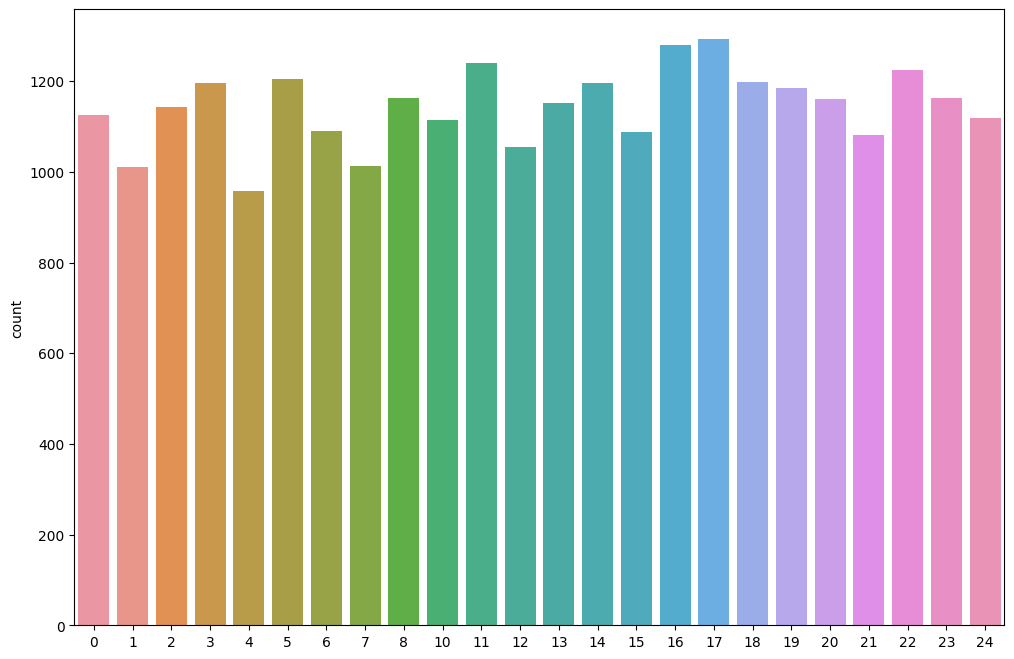

In [15]:
plt.figure(figsize = (12,8))
sns.countplot(x=labels)

#### Preprocessing

In [16]:
test_df_copy = test_df.iloc[:,0]

In [17]:
test_df_copy.head(5)

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [18]:
train_df.drop('label', axis = 1, inplace = True)

In [19]:
test_df.drop('label', axis = 1, inplace = True)

In [20]:
images = train_df.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

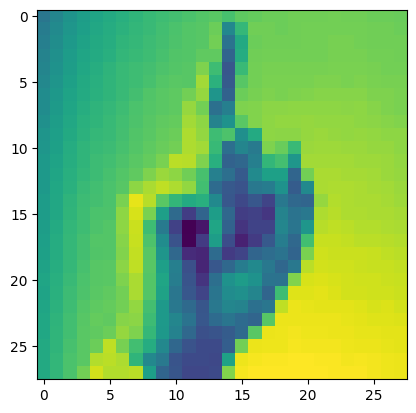

In [22]:
plt.imshow(images[0].reshape(28,28))

#### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 45)

In [24]:
x_train.shape

(21964, 784)

In [25]:
x_test.shape

(5491, 784)

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [28]:
x_train.shape

(21964, 28, 28, 1)

In [29]:
x_test.shape

(5491, 28, 28, 1)

#### Data Augmentation

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [32]:
datagen.fit(x_train)

#### CNN Classification

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [34]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1,factor=0.5, min_lr=0.00001)

In [35]:
model = Sequential()

model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [36]:
num_epochs = 15

In [37]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = num_epochs, validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/15
172/172 [==============================] - 97s 549ms/step - loss: 1.1712 - accuracy: 0.6323 - val_loss: 3.4177 - val_accuracy: 0.0738 - lr: 0.0010
Epoch 2/15
172/172 [==============================] - 94s 545ms/step - loss: 0.2827 - accuracy: 0.9084 - val_loss: 2.8233 - val_accuracy: 0.1850 - lr: 0.0010
Epoch 3/15
172/172 [==============================] - 96s 554ms/step - loss: 0.1311 - accuracy: 0.9573 - val_loss: 0.3779 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 4/15
172/172 [==============================] - 94s 545ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.6019 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 5/15
172/172 [==============================] - 99s 571ms/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.0226 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 6/15
172/172 [==============================] - 93s 544ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0784 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 7/15
172/172 [==============================] 

In [38]:
result = model.evaluate(x_test,y_test)

172/172 [==============================] - 6s 32ms/step - loss: 0.0019 - accuracy: 0.9998


In [39]:
accuracy = result[1]*100

In [64]:
print('Accuracy of the Model : %.2f' % (accuracy), '%')

Accuracy of the Model : 99.98 %


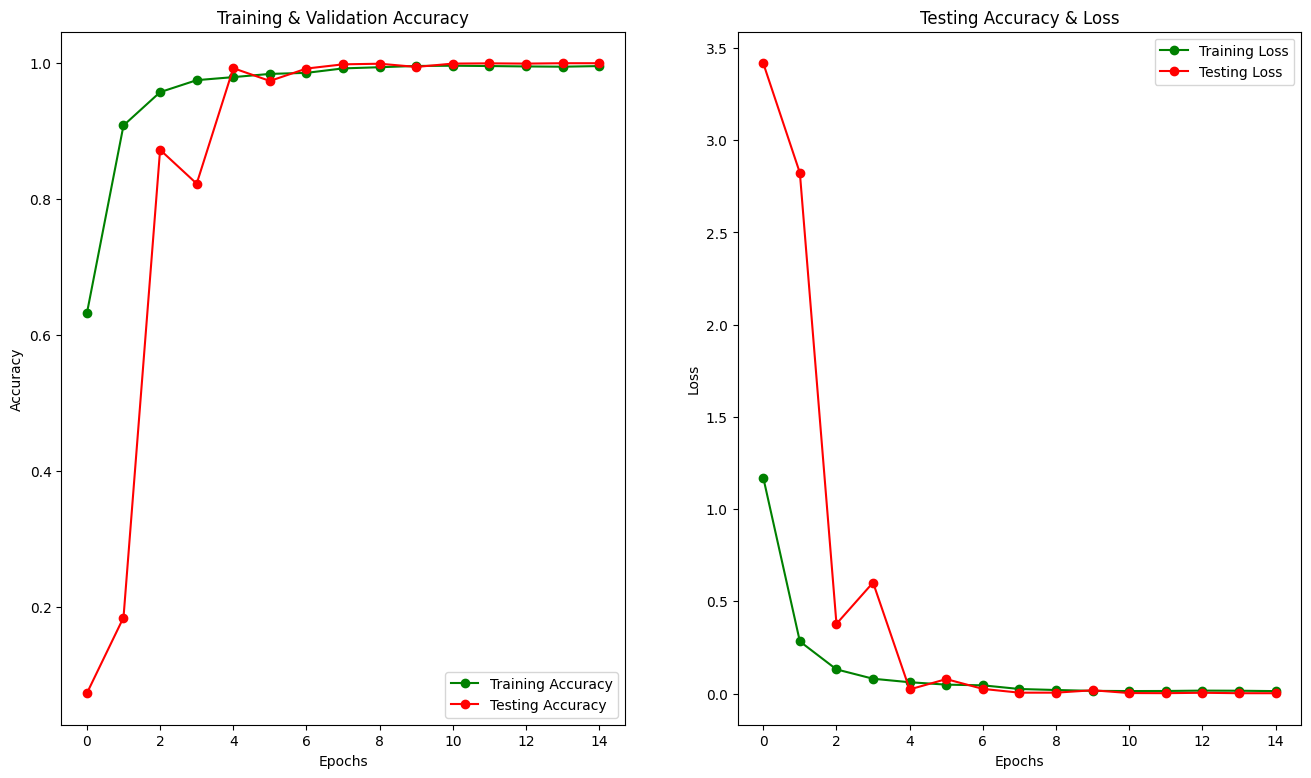

In [66]:
epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [67]:
from google.colab import files

files.download('CNN Model Reports.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>